In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
data = pd.read_csv(r'data\Updated Quality of Life Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10000 non-null  int64  
 1   gender                      10000 non-null  object 
 2   occupation_type             10000 non-null  object 
 3   avg_work_hours_per_day      10000 non-null  float64
 4   avg_rest_hours_per_day      10000 non-null  float64
 5   avg_sleep_hours_per_day     10000 non-null  float64
 6   avg_exercise_hours_per_day  10000 non-null  float64
 7   age_at_death                10000 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [138]:
data.describe()

,id,avg_work_hours_per_day,avg_rest_hours_per_day,avg_sleep_hours_per_day,avg_exercise_hours_per_day,age_at_death
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,15000.50000,9.211857,5.964582,7.364192,1.459726,79.85060
std,2886.89568,2.903739,3.152097,2.214386,0.954428,12.02562
min,10001.00000,0.010000,0.000000,0.000000,0.000000,25.00000
25%,12500.75000,7.740000,3.890000,6.310000,0.650000,74.00000
50%,15000.50000,8.960000,5.830000,7.390000,1.440000,81.00000
75%,17500.25000,10.440000,7.670000,8.470000,2.250000,88.00000
max,20000.00000,23.970000,23.930000,19.980000,5.930000,100.00000


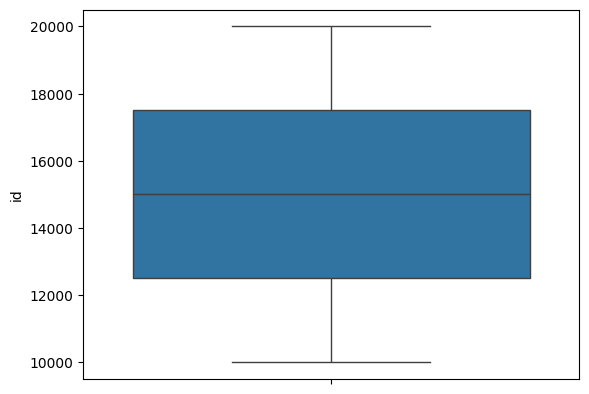

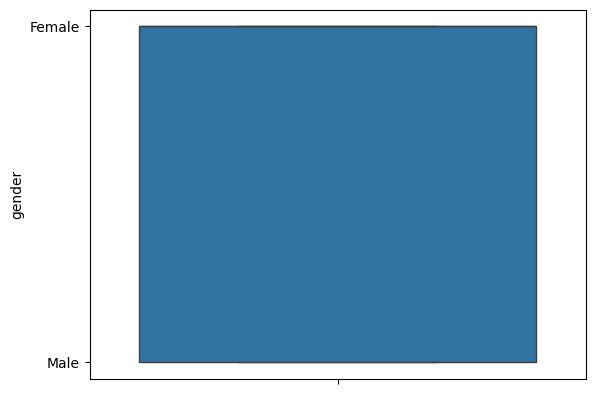

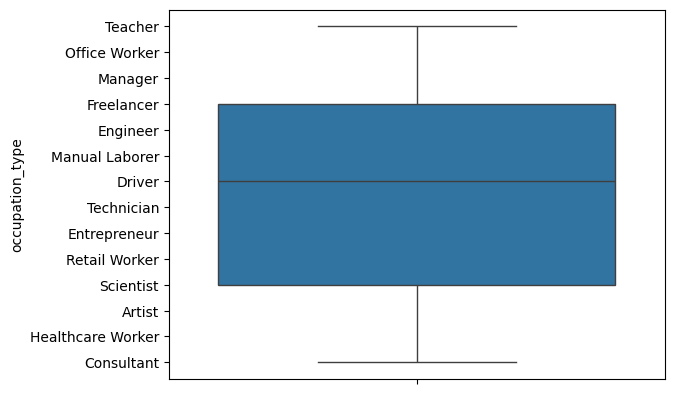

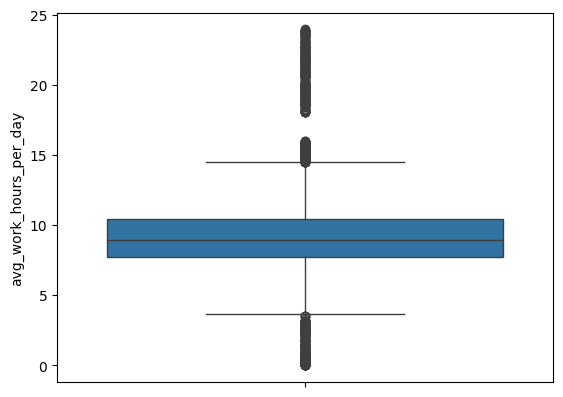

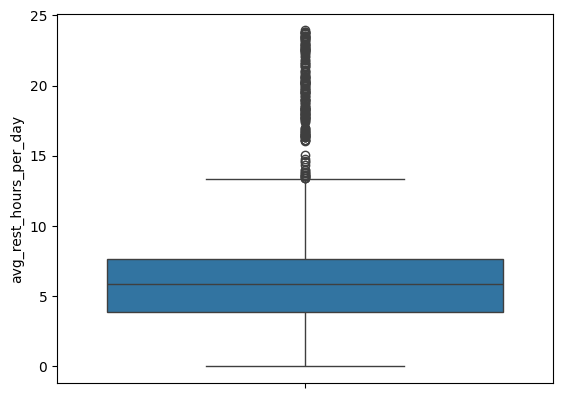

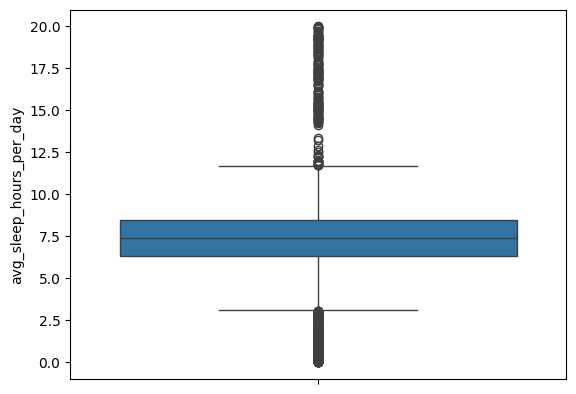

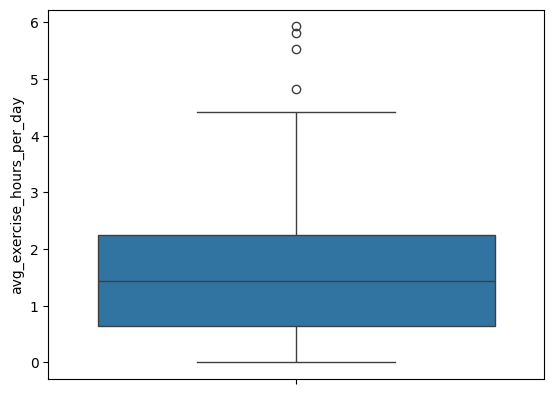

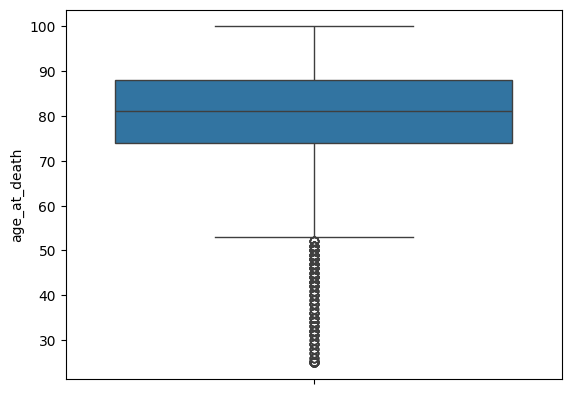

In [139]:
for col in data.columns:
    sns.boxplot(data[col])
    plt.show()

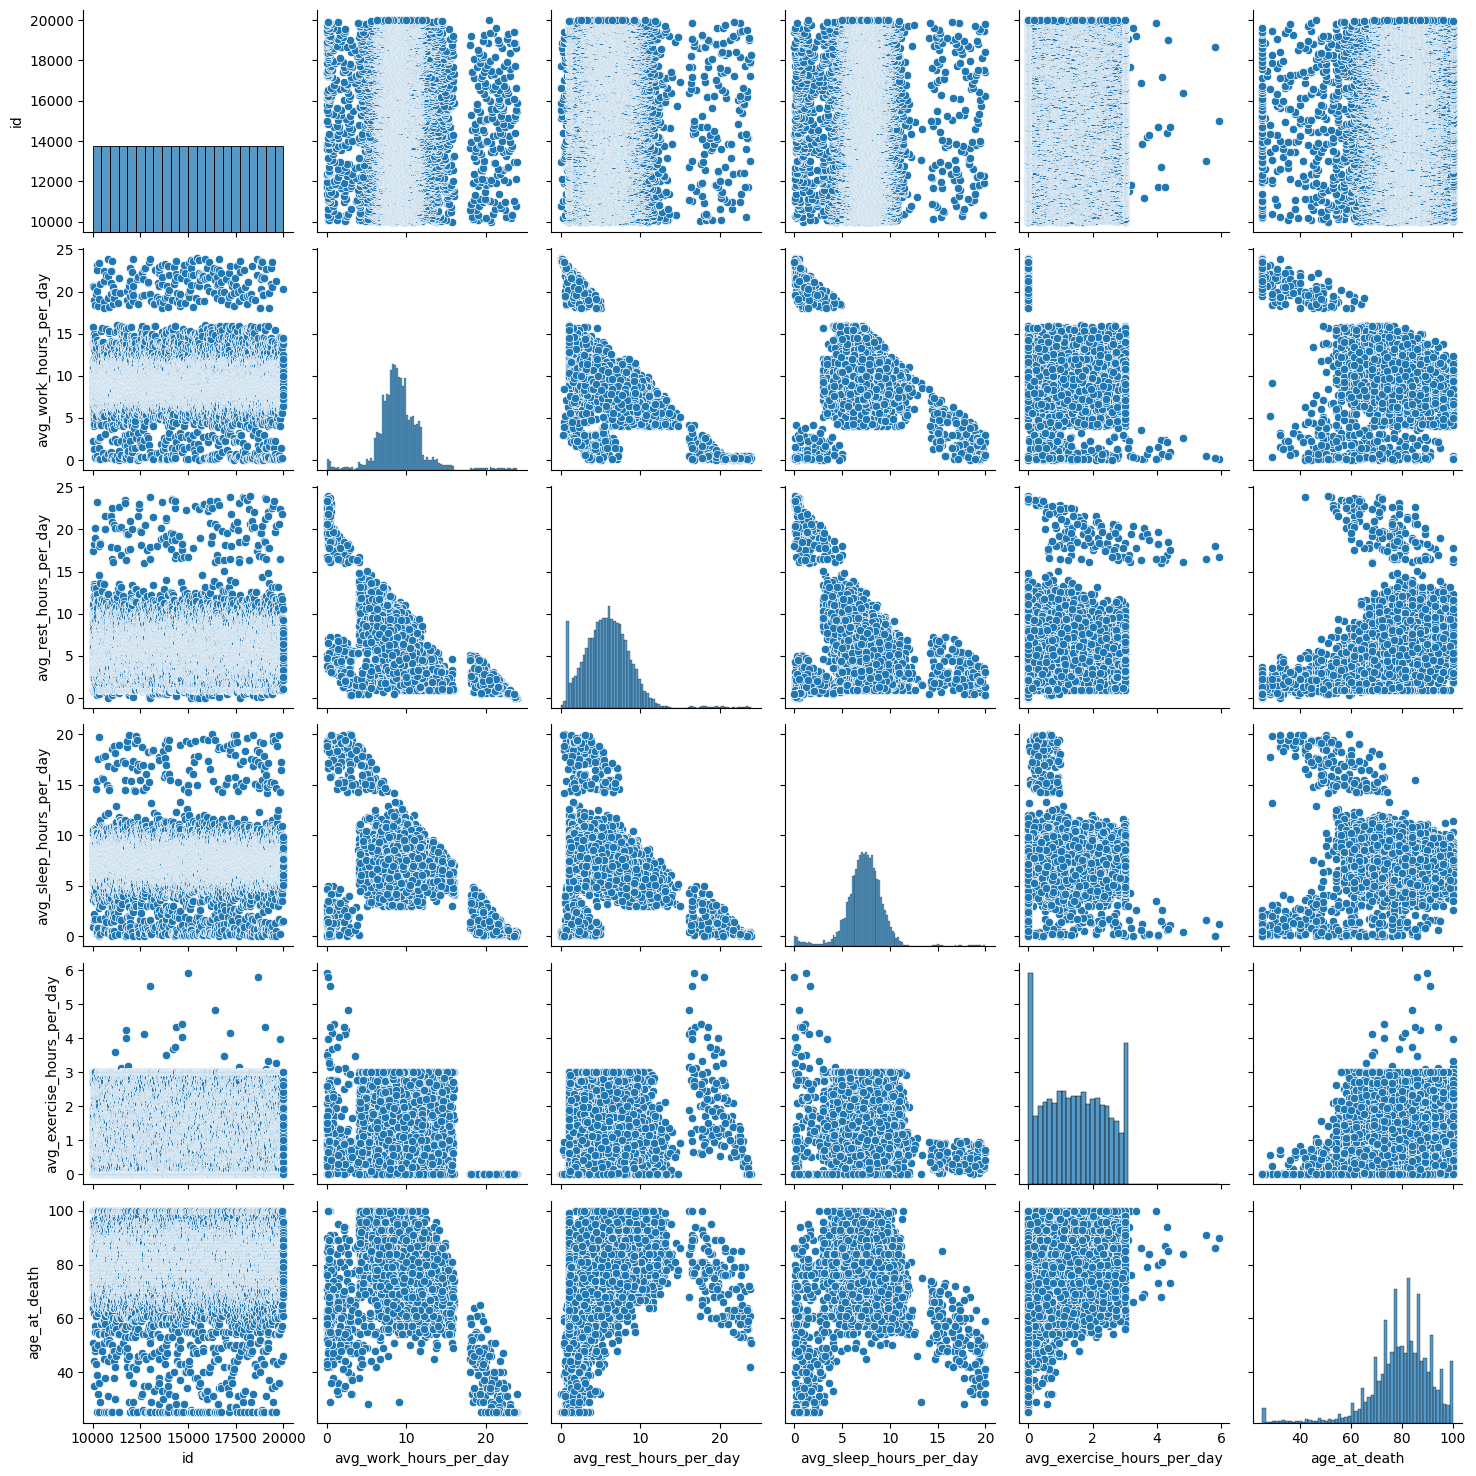

In [140]:
sns.pairplot(data)

In [ ]:
# data['active_hours'] = data['avg_work_hours_per_day'] + data['avg_exercise_hours_per_day']
# data['recovery_hours'] = data['avg_sleep_hours_per_day'] + data['avg_rest_hours_per_day']
# data['work_sleep_ratio'] = data['avg_work_hours_per_day'] / data['avg_sleep_hours_per_day'].replace(0,np.nan)
# data['activity_balance'] = data['recovery_hours'] - data['active_hours'] 

In [142]:
data.drop(columns=['id'],inplace=True)

In [143]:
x = data.drop(columns=['age_at_death'])
y = data['age_at_death']

In [144]:
x = pd.get_dummies(data, columns=['gender','occupation_type'], drop_first=True)

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=50,test_size=0.2)

In [146]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200,n_jobs=-1)
model.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [147]:
y_pred = model.predict(x_test)

In [148]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("r2 score :",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))

r2 score : 0.9999981719194199
MAE: 0.0012325000000000016
MSE: 0.00024393749999999958
